<a href="https://colab.research.google.com/github/akshaykumar2972/POC2025/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Marketind Dataset all columns.csv").drop_duplicates()
df.head()

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,...,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer,Age_Group,OfferAccepted,IncomeSegment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1617,22,73.500000,3,5,5,4628,60-69,0,Upper-Mid
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,27,4,6.750000,4,1,1,4078,70-79,0,Lower-Mid
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,776,20,38.800000,4,4,4,4277,60-69,0,High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,53,6,8.833333,4,2,1,4104,40-49,0,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,422,14,30.142857,1,3,3,4126,40-49,0,Upper-Mid


In [ ]:
df.iloc[:,:20].head()

,CustomerId,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,EnrolledDate,DaysSinceLastPurchase,AmountSpentOnWine,AmountSpentOnFruits,AmountSpentOnMeatProducts,AmountSpentOnFishProducts,AmountSpentOnSweetProducts,AmountSpentOnGoldProducts,PurchasesMadeWithDiscounts,PurchasesMadeViaWeb,PurchasesMadeViaCatalog,PurchasesMadeDirectly,NumberOfVisitsToWebsitePerMonth
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
df.iloc[:,21:].head()

,IsCampaign4Accepted,IsCampaign5Accepted,IsCampaign1Accepted,IsCampaign2Accepted,HasComplainedInLast2Months,IsLastCampaignAccepted,Age,TotalAmountSpent,TotalPurchasesCount,AverageSpendPerPurchase,Recency,Frequency,Monetary,NumberOfDaysAsCustomer,Age_Group,OfferAccepted,IncomeSegment
0,0,0,0,0,0,1,68,1617,22,73.500000,3,5,5,4628,60-69,0,Upper-Mid
1,0,0,0,0,0,0,71,27,4,6.750000,4,1,1,4078,70-79,0,Lower-Mid
2,0,0,0,0,0,0,60,776,20,38.800000,4,4,4,4277,60-69,0,High
3,0,0,0,0,0,0,41,53,6,8.833333,4,2,1,4104,40-49,0,Low
4,0,0,0,0,0,0,44,422,14,30.142857,1,3,3,4126,40-49,0,Upper-Mid


Text(0, 0.5, 'Total Purchases Count')

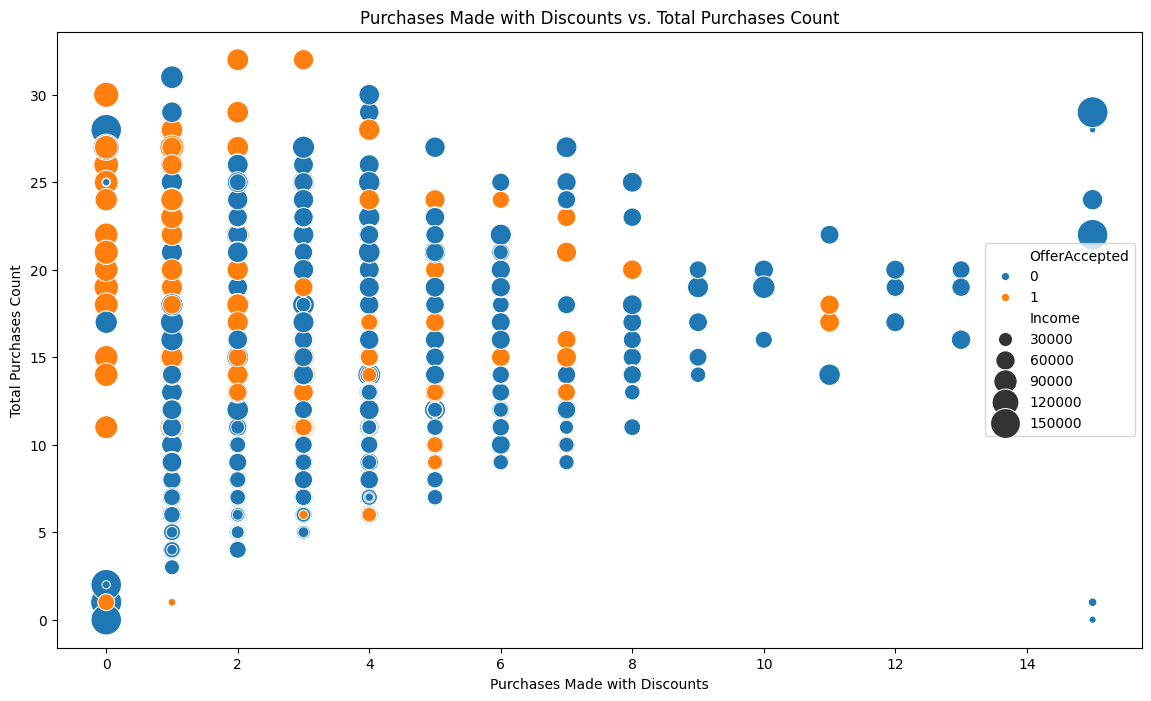

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='PurchasesMadeWithDiscounts', y='TotalPurchasesCount', data=df, hue='OfferAccepted', size='Income', sizes=(20, 500))
plt.title('Purchases Made with Discounts vs. Total Purchases Count')
plt.xlabel('Purchases Made with Discounts')
plt.ylabel('Total Purchases Count')

<Axes: xlabel='Income', ylabel='AverageSpendPerPurchase'>

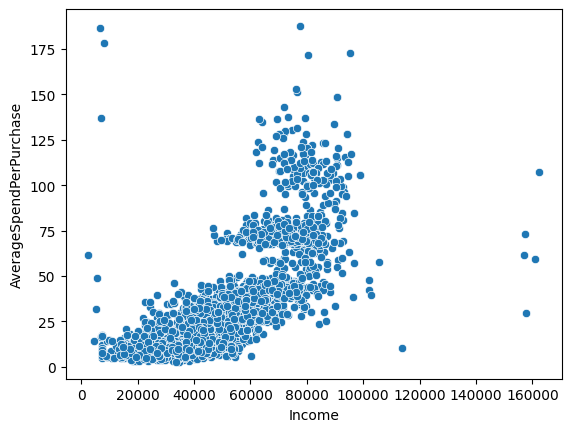

In [ ]:
sns.scatterplot(x='Income', y='AverageSpendPerPurchase', data=df.loc[df['AverageSpendPerPurchase'] < 1500])

In [ ]:
df_amount = pd.melt(df
                    , id_vars=['CustomerId']
                    , value_vars=['AmountSpentOnWine', 'AmountSpentOnFruits', 'AmountSpentOnMeatProducts', 'AmountSpentOnFishProducts', 'AmountSpentOnSweetProducts', 'AmountSpentOnGoldProducts']
                    , var_name='ProductCategory'
                    , value_name='AmountSpent')

In [ ]:
df_amount['ProductCategory'] = df_amount['ProductCategory'].str.replace('AmountSpentOn', '').str.replace('Products', '')

In [ ]:
df_amount['ProductCategory'].unique()

array(['Wine', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'], dtype=object)

In [ ]:
df_amount.head(10)

,CustomerId,ProductCategory,AmountSpent
0,5524,Wine,635
1,2174,Wine,11
2,4141,Wine,426
3,6182,Wine,11
4,5324,Wine,173
5,7446,Wine,520
6,965,Wine,235
7,6177,Wine,76
8,4855,Wine,14
9,5899,Wine,28


<Axes: xlabel='ProductCategory', ylabel='AmountSpent'>

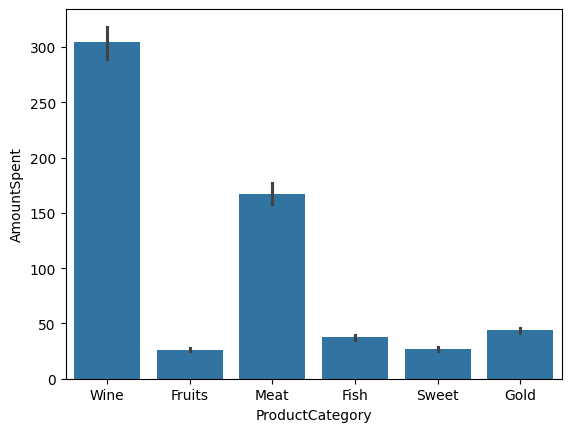

In [ ]:
sns.barplot(x='ProductCategory', y='AmountSpent', data=df_amount)

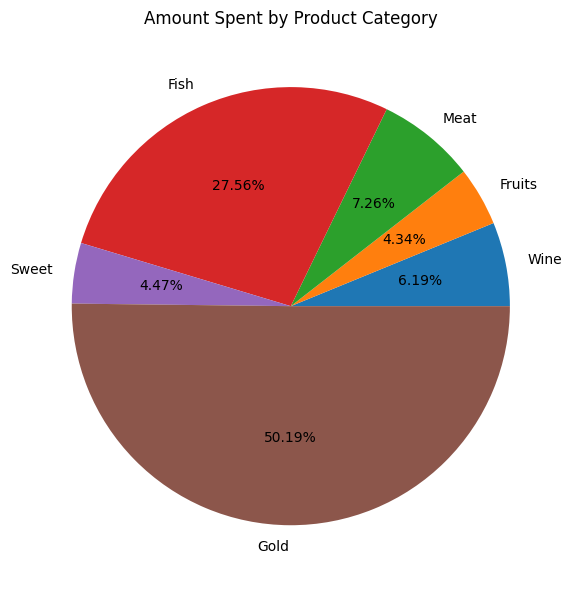

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df_amount.groupby('ProductCategory')['AmountSpent'].sum(), labels=df_amount['ProductCategory'].unique(), autopct='%1.2f%%')
plt.title('Amount Spent by Product Category')
plt.tight_layout()
plt.show()

In [ ]:
df_amount.groupby('ProductCategory')['AmountSpent'].sum()

,AmountSpent
ProductCategory,
Fish,83931
Fruits,58753
Gold,98346
Meat,373375
Sweet,60552
Wine,680029


In [ ]:
df_purchase = pd.melt(df
                      , id_vars=['CustomerId']
                      , value_vars=['PurchasesMadeViaWeb', 'PurchasesMadeViaCatalog', 'PurchasesMadeDirectly']
                      , var_name='PurchaseChannel'
                      , value_name='NumberOfPurchasesMade')

In [ ]:
df_purchase['PurchaseChannel'] = df_purchase['PurchaseChannel'].str.replace('PurchasesMadeVia', '').str.replace('PurchasesMadeDirectly', 'Direct')

In [ ]:
df_purchase.head(10)

,CustomerId,PurchaseChannel,NumberOfPurchasesMade
0,5524,Web,8
1,2174,Web,1
2,4141,Web,8
3,6182,Web,2
4,5324,Web,5
5,7446,Web,6
6,965,Web,7
7,6177,Web,4
8,4855,Web,3
9,5899,Web,1


<Axes: xlabel='PurchaseChannel', ylabel='NumberOfPurchasesMade'>

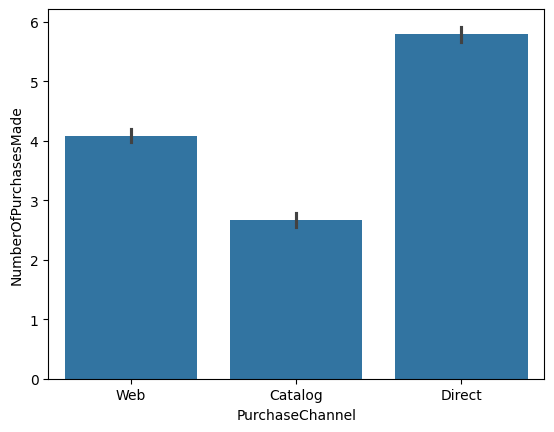

In [ ]:
sns.barplot(x='PurchaseChannel', y='NumberOfPurchasesMade', data=df_purchase)

In [ ]:
df_purchase.groupby('PurchaseChannel')['NumberOfPurchasesMade'].sum()

,NumberOfPurchasesMade
PurchaseChannel,
Catalog,5955
Direct,12959
Web,9140


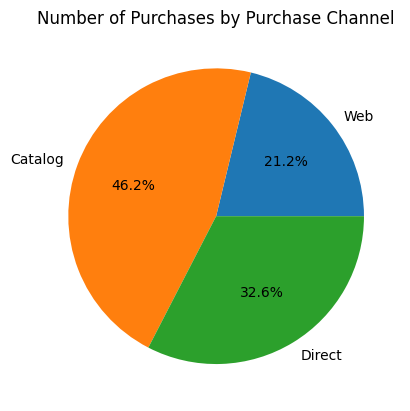

In [ ]:
plt.pie(df_purchase.groupby('PurchaseChannel')['NumberOfPurchasesMade'].sum(), labels=df_purchase['PurchaseChannel'].unique(), autopct='%1.1f%%')
plt.title('Number of Purchases by Purchase Channel')
plt.show()

<Axes: xlabel='Age_Group', ylabel='Income'>

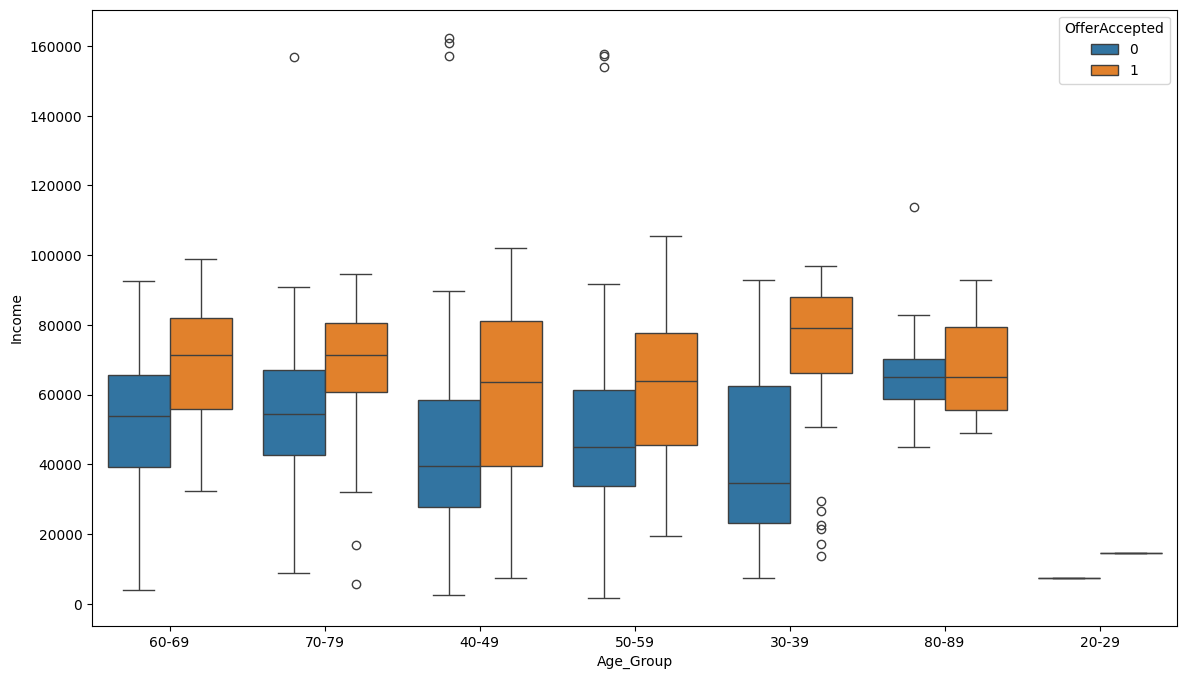

In [ ]:
# add proper (Age) order to the below chart
plt.figure(figsize=(14,8))
sns.boxplot(x='Age_Group', y='Income', data=df, hue='OfferAccepted')

<Axes: xlabel='Age_Group', ylabel='TotalAmountSpent'>

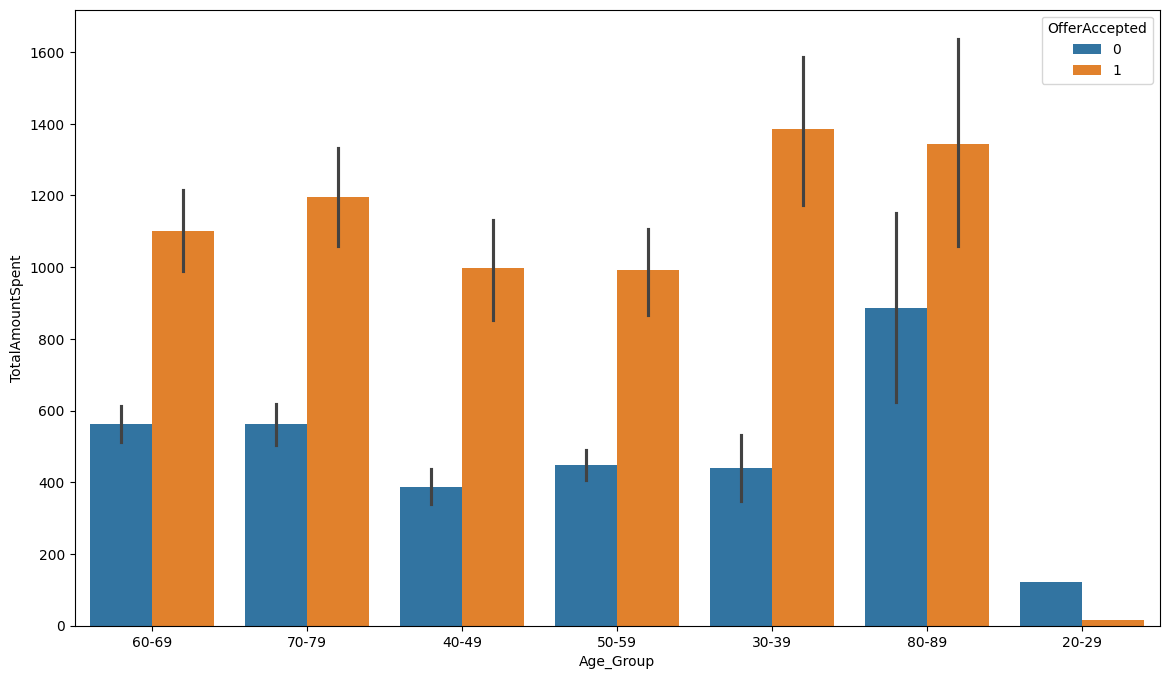

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Age_Group', y='TotalAmountSpent', data=df, hue='OfferAccepted')

<Axes: xlabel='Age_Group', ylabel='TotalAmountSpent'>

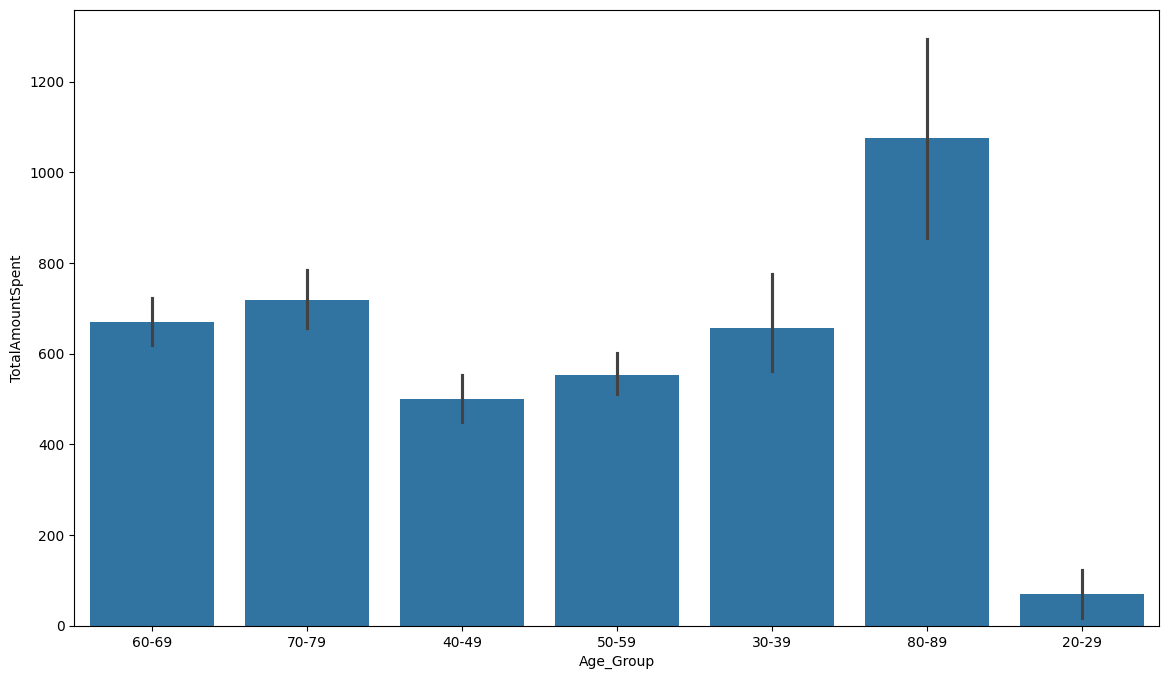

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Age_Group', y='TotalAmountSpent', data=df)

<Axes: xlabel='Age', ylabel='Income'>

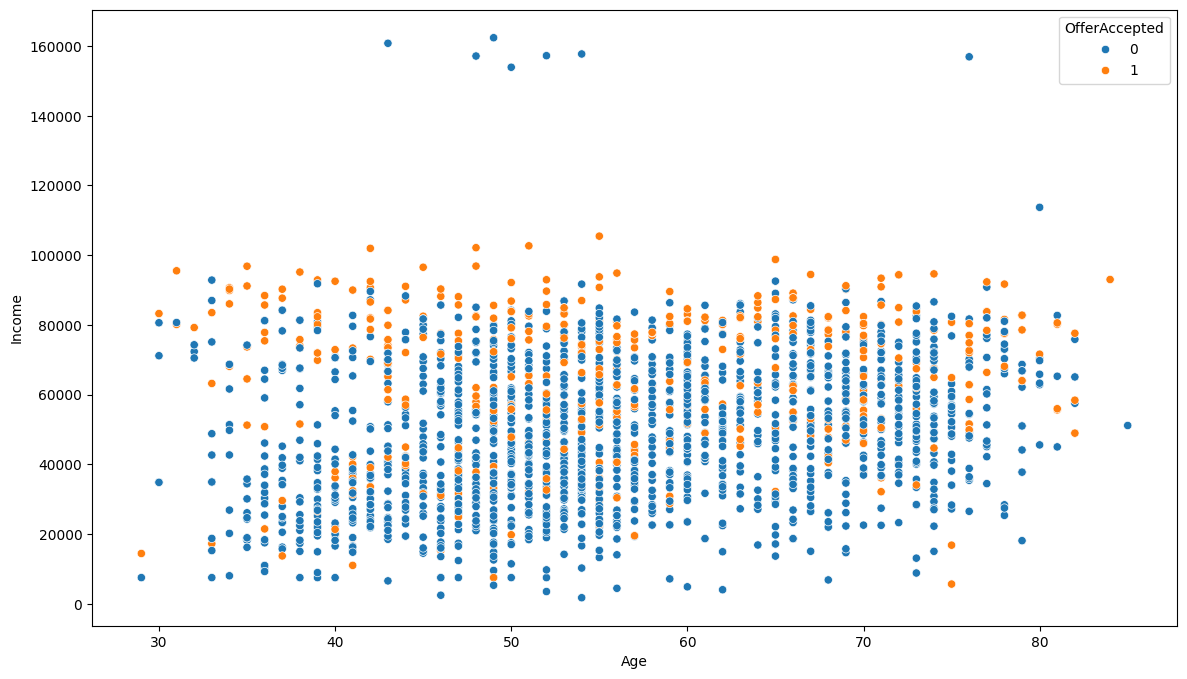

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age', y='Income', data=df, hue='OfferAccepted')

<Axes: xlabel='TotalAmountSpent', ylabel='Income'>

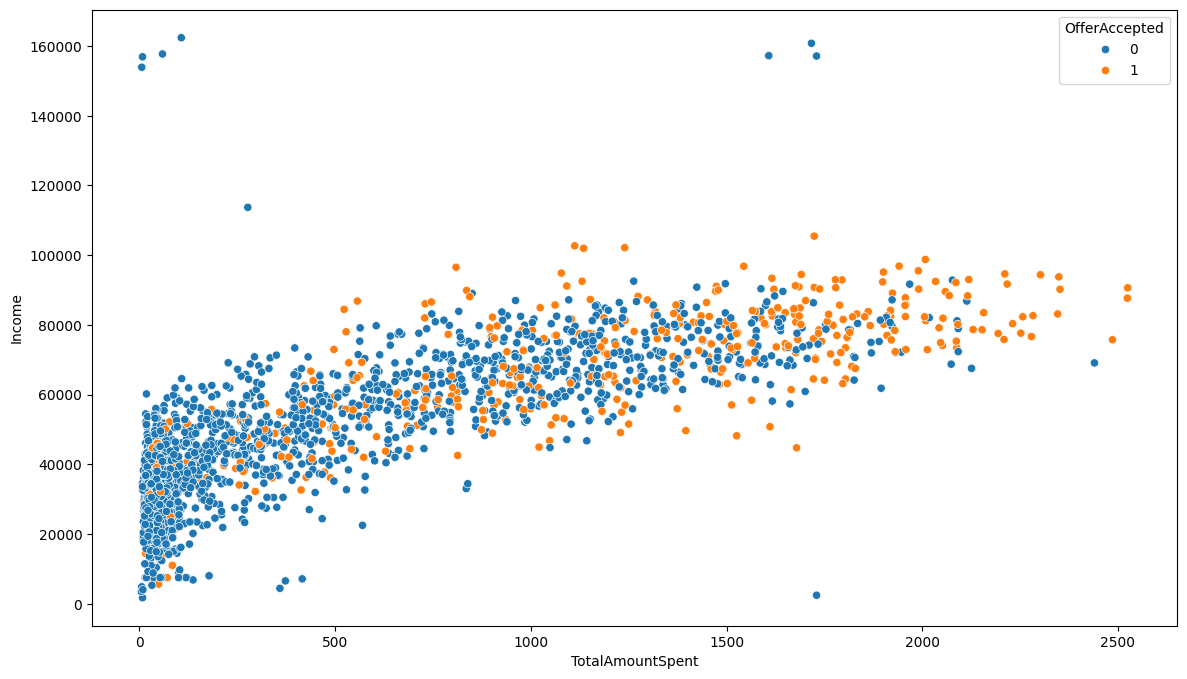

In [ ]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='TotalAmountSpent', y='Income', data=df, hue='OfferAccepted')

In [ ]:
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary']

In [ ]:
conditions = [df['RFM_Score'] >= 12, df['RFM_Score'].between(9, 11), df['RFM_Score'].between(6, 8), df['RFM_Score'].between(4, 5), df['RFM_Score'] <= 3]
segment_names = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost']

In [ ]:
df['CustomerSegment'] = np.select(conditions, segment_names, default='Unknown')

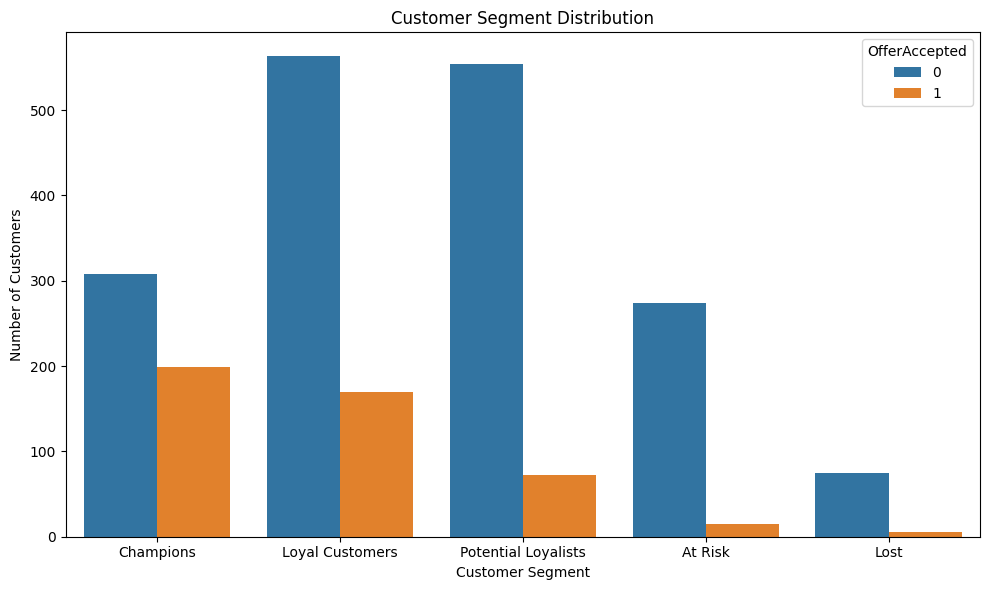

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CustomerSegment', order=['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost'], hue='OfferAccepted')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [ ]:
crosstab = pd.crosstab(df['CustomerSegment'], df['OfferAccepted'], margins=True, normalize=True) * 100
crosstab = crosstab.round(2)
segment_order = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Lost', 'All']
crosstab = crosstab.reindex(segment_order)

In [ ]:
crosstab_str = crosstab.applymap(lambda x: f'{x:.2f} %')
print(crosstab_str)

OfferAccepted              0        1       All
CustomerSegment                                
Champions            13.77 %   8.90 %   22.67 %
Loyal Customers      25.18 %   7.60 %   32.78 %
Potential Loyalists  24.78 %   3.22 %   28.00 %
At Risk              12.25 %   0.67 %   12.92 %
Lost                  3.35 %   0.27 %    3.62 %
All                  79.34 %  20.66 %  100.00 %


In [ ]:
pd.crosstab(df['CustomerSegment'], df['OfferAccepted'], margins=True) * 100

OfferAccepted,0,1,All
CustomerSegment,,,
At Risk,27400,1500,28900
Champions,30800,19900,50700
Lost,7500,600,8100
Loyal Customers,56300,17000,73300
Potential Loyalists,55400,7200,62600
All,177400,46200,223600


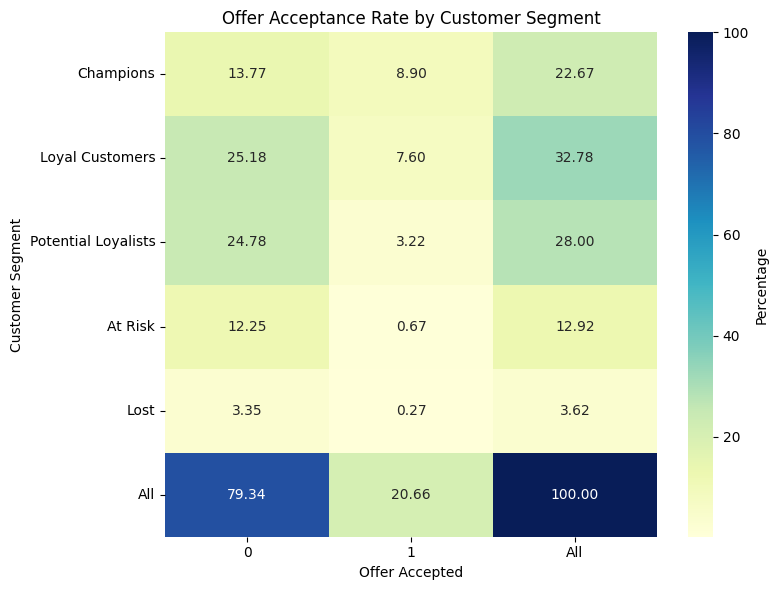

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title('Offer Acceptance Rate by Customer Segment')
plt.ylabel('Customer Segment')
plt.xlabel('Offer Accepted')
plt.tight_layout()
plt.show()

In [ ]:
crosstab_percent = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

In [ ]:
crosstab_df = pd.DataFrame(crosstab_percent.reset_index())
crosstab_df

OfferAccepted,CustomerSegment,0,1,All
0,Champions,8.678389,21.539206,11.335567
1,Loyal Customers,15.869415,18.393030,16.390820
2,Potential Loyalists,15.617319,7.792836,14.000700
3,At Risk,7.720426,1.621491,6.460323
4,Lost,2.111300,0.653437,1.810091
5,All,50.003151,50.000000,50.002500


In [ ]:
crosstab_df_cleaned = crosstab_df.iloc[:-1, 1:]

In [ ]:
crosstab_df_cleaned

OfferAccepted,0,1,All
0,8.678389,21.539206,11.335567
1,15.869415,18.393030,16.390820
2,15.617319,7.792836,14.000700
3,7.720426,1.621491,6.460323
4,2.111300,0.653437,1.810091


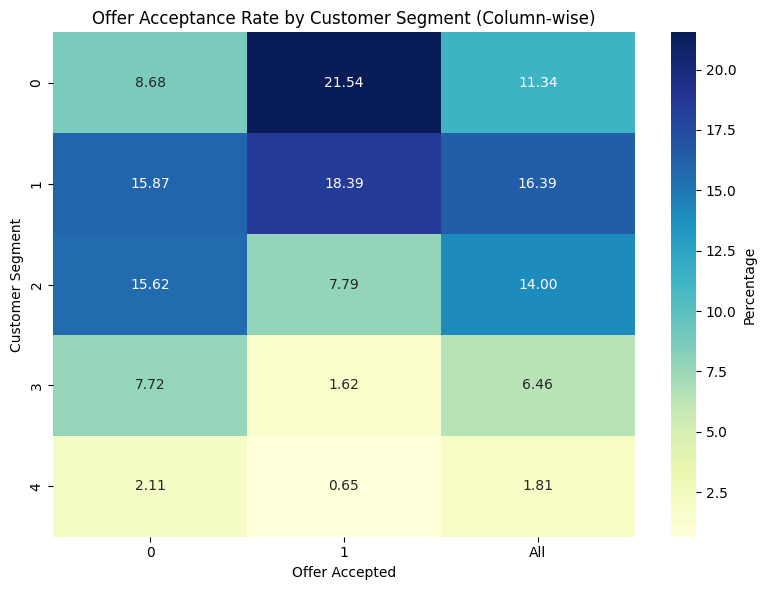

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_df_cleaned, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Percentage'})
plt.title('Offer Acceptance Rate by Customer Segment (Column-wise)')
plt.ylabel('Customer Segment')
plt.xlabel('Offer Accepted')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('EnrolledDate')['CustomerId'].nunique().reset_index().head(10)

,EnrolledDate,CustomerId
0,2012-07-30,1
1,2012-07-31,1
2,2012-08-01,4
3,2012-08-02,3
4,2012-08-03,5
...,...,...
658,2014-06-25,5
659,2014-06-26,4
660,2014-06-27,3
661,2014-06-28,3


from matplotlib import pyplot as plt
_df_0['CustomerId'].plot(kind='hist', bins=20, title='CustomerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EnrolledDate']
  ys = series['CustomerId']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('EnrolledDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EnrolledDate')
_ = plt.ylabel('CustomerId')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['EnrolledDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'EnrolledDate'}, axis=1)
              .sort_values('EnrolledDate', ascending=True))
  xs = counted['EnrolledDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('EnrolledDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EnrolledDate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['CustomerId'].plot(kind='line', figsize=(8, 4), title='CustomerId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_grouped = df.groupby('EnrolledDate')['CustomerId'].nunique().reset_index()

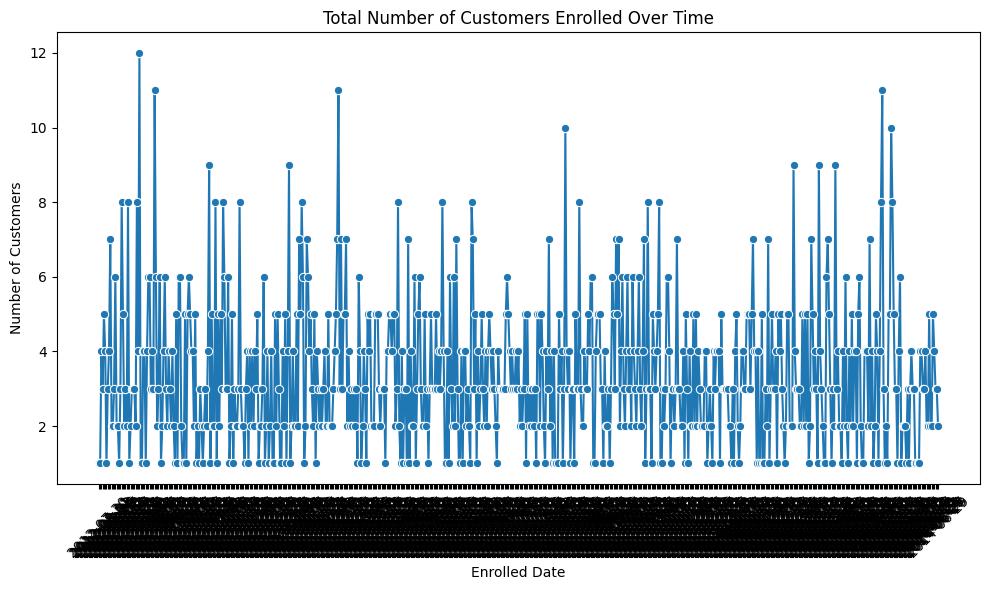

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='EnrolledDate', y='CustomerId', data=df_grouped, marker='o')
plt.title('Total Number of Customers Enrolled Over Time')
plt.xlabel('Enrolled Date')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#perform cummulative sum over time period